<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#UNDERSTAND-THE-PROBLEM-STATMENT-AND-BUSINESS-CASE" data-toc-modified-id="UNDERSTAND-THE-PROBLEM-STATMENT-AND-BUSINESS-CASE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE</a></span></li><li><span><a href="#IMPORT-LIBRARIES-AND-DATASETS" data-toc-modified-id="IMPORT-LIBRARIES-AND-DATASETS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPORT LIBRARIES AND DATASETS</a></span></li><li><span><a href="#PERFORM-DATA-CLEANING" data-toc-modified-id="PERFORM-DATA-CLEANING-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PERFORM DATA CLEANING</a></span></li><li><span><a href="#VISUALIZE-CLEANED-UP-DATASET" data-toc-modified-id="VISUALIZE-CLEANED-UP-DATASET-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>VISUALIZE CLEANED UP DATASET</a></span></li><li><span><a href="#:-PREPARE-THE-DATA-BY-PERFORMING-TOKENIZATION-AND-PADDING" data-toc-modified-id=":-PREPARE-THE-DATA-BY-PERFORMING-TOKENIZATION-AND-PADDING-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING</a></span></li><li><span><a href="#:-UNDERSTAND-THE-THEORY-AND-INTUITION-BEHIND-RECURRENT-NEURAL-NETWORKS-AND-LSTM" data-toc-modified-id=":-UNDERSTAND-THE-THEORY-AND-INTUITION-BEHIND-RECURRENT-NEURAL-NETWORKS-AND-LSTM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM</a></span></li><li><span><a href="#UNDERSTAND-THE-INTUITION-BEHIND-LONG-SHORT-TERM-MEMORY-(LSTM)-NETWORKS" data-toc-modified-id="UNDERSTAND-THE-INTUITION-BEHIND-LONG-SHORT-TERM-MEMORY-(LSTM)-NETWORKS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>UNDERSTAND THE INTUITION BEHIND LONG SHORT TERM MEMORY (LSTM) NETWORKS</a></span></li><li><span><a href="#BUILD-AND-TRAIN-THE-MODEL" data-toc-modified-id="BUILD-AND-TRAIN-THE-MODEL-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>BUILD AND TRAIN THE MODEL</a></span></li><li><span><a href="#ASSESS-TRAINED-MODEL-PERFORMANCE" data-toc-modified-id="ASSESS-TRAINED-MODEL-PERFORMANCE-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ASSESS TRAINED MODEL PERFORMANCE</a></span></li></ul></div>

# UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE

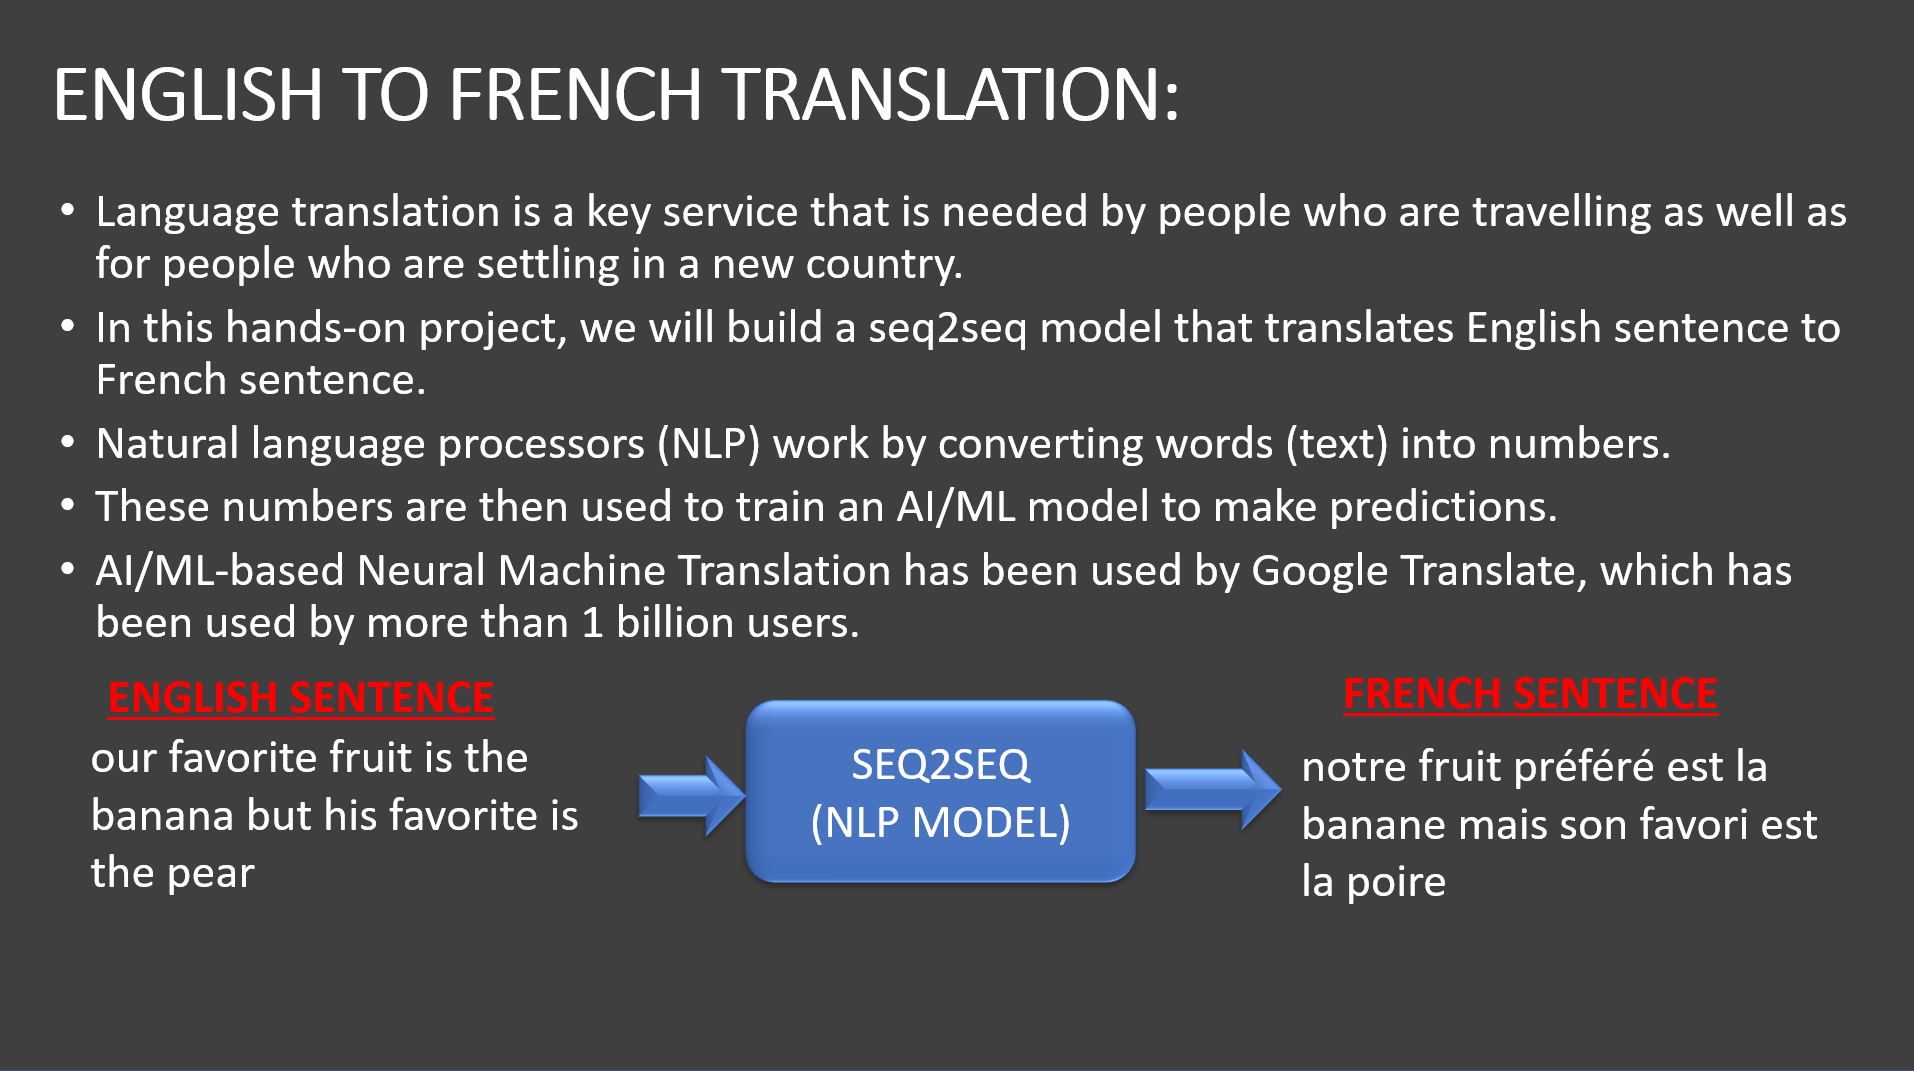

#  IMPORT LIBRARIES AND DATASETS

In [55]:
# !pip install --upgrade tensorflow-gpu==2.0

In [56]:
# install nltk
# !pip install nltk
# # install gensim
# !pip install gensim
# # install spacy
# !pip install spacy
# !pip install plotly

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

<ipython-input-3-fb6af57a13c8>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
<ipython-input-3-fb6af57a13c8>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])


In [4]:
df_english

english
0       new jersey is sometimes quiet during autumn , ...
1       the united states is usually chilly during jul...
2       california is usually quiet during march , and...
3       the united states is sometimes mild during jun...
4       your least liked fruit is the grape , but my l...
...                                                   ...
137855  france is never busy during march , and it is ...
137856  india is sometimes beautiful during spring , a...
137857  india is never wet during summer , but it is s...
137858  france is never chilly during january , but it...
137859  the orange is her favorite fruit , but the ban...

[137860 rows x 1 columns]

In [5]:
df_french

french
0       new jersey est parfois calme pendant l' automn...
1       les états-unis est généralement froid en juill...
2       california est généralement calme en mars , et...
3       les états-unis est parfois légère en juin , et...
4       votre moins aimé fruit est le raisin , mais mo...
...                                                   ...
137855  la france est jamais occupée en mars , et il e...
137856  l' inde est parfois belle au printemps , et il...
137857  l' inde est jamais mouillé pendant l' été , ma...
137858  la france est jamais froid en janvier , mais i...
137859  l'orange est son fruit préféré , mais la banan...

[137860 rows x 1 columns]

 
- Explore the 'english' and 'french' data and indicate how many samples are included.
- Do we have Null elements? What are the memory usage for both dataframes?

In [6]:
print(df_english.isnull().sum().sum())

print(df_french.isnull().sum().sum())

0
0



- Concatenate both dataframes and indicate how many records are present
- Print out the following: "Total English Records = xx, Total French Records = xx"

In [7]:
df=pd.concat([df_english,df_french],axis=1)
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

In [8]:
print('total english records={}'.format(len(df['english'])))
print('total french records={}'.format(len(df['french'])))

total english records=137860
total french records=137860


# PERFORM DATA CLEANING

In [9]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
# function to remove punctuations
def remove_punc(x):
    return re.sub('[!#?,.:";]', '', x)

In [11]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [12]:
english_words = []
french_words  = []


- How many unique words are available in the english and french dictionairies?





In [13]:
def get_unique_words(x,word_list):
    for word in x .split():
        if word not in word_list:
            word_list.append(word)

df['english'].apply(lambda x:get_unique_words(x,english_words))
df['french'].apply(lambda x:get_unique_words(x,french_words))
english_words
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 "l'orange",
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 "n'aime",
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 "l'automne",
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'm

In [16]:
# number of unique words in french
total_english_words=len(english_words)
total_english_words

199

In [17]:
total_french_words=len(french_words)
total_french_words

350

# VISUALIZE CLEANED UP DATASET

In [18]:
# Obtain list of all words in the dataset
words = []
for i in df['english']: # go to english column
    for word in i.split():
        words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [19]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [20]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [21]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [23]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [24]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [25]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [26]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

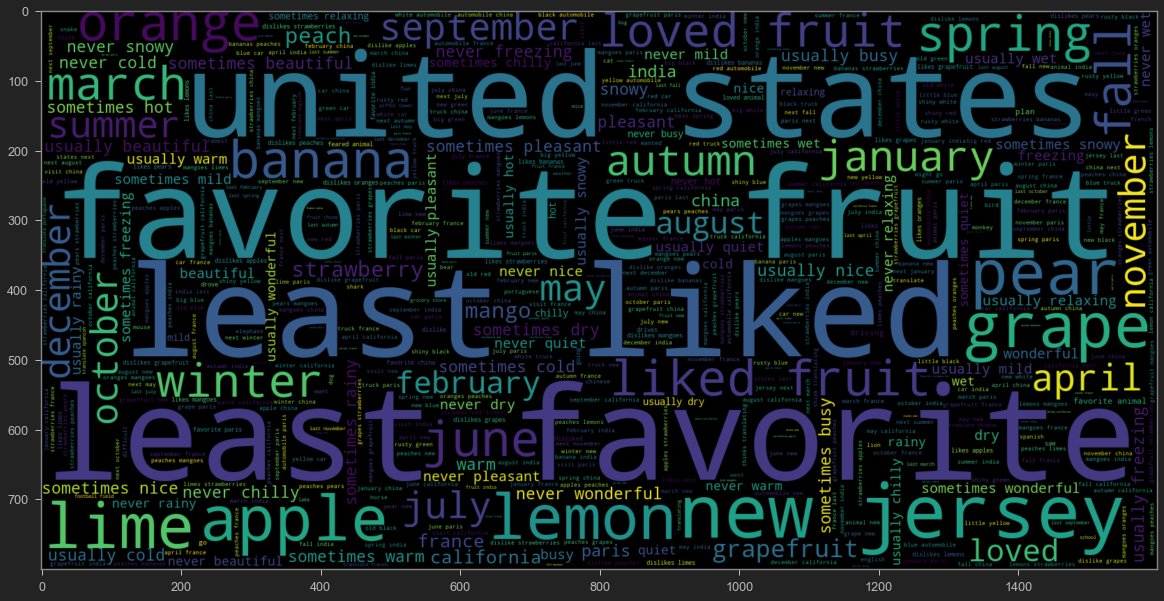

In [27]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [28]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [29]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


 
- Perform similar data visualizations but for the french language instead
- What are the top 3 common french words?!
- What is the maximum number of words in any french document?

The maximum number of words in any document =  23


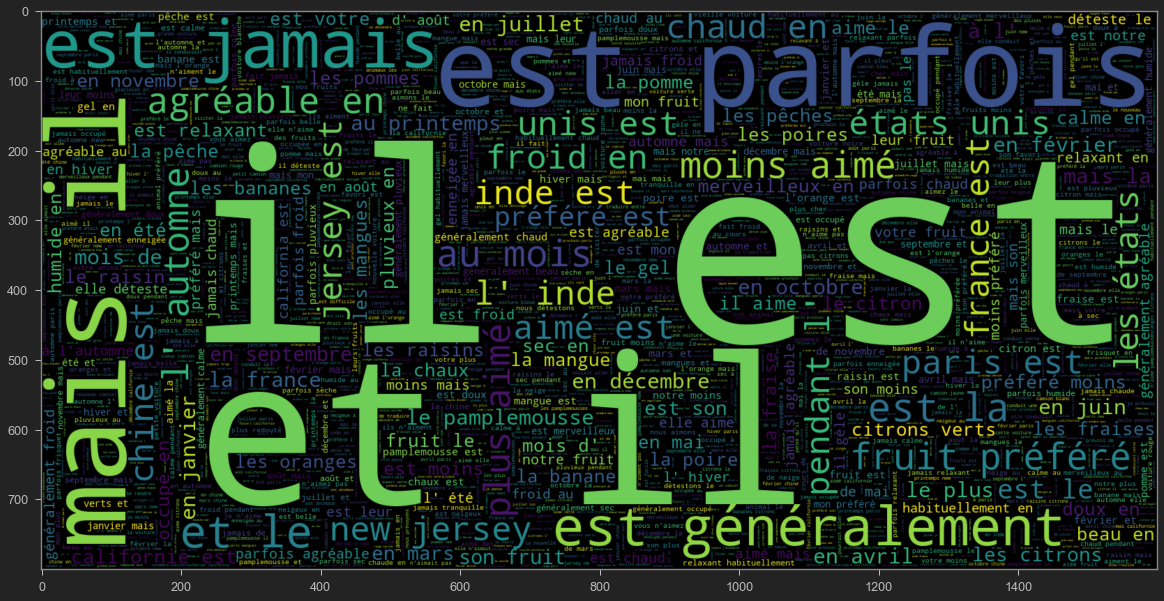

In [30]:
# obtain the count of french words
words = []
for i in df['french']:
    for word in i.split():
        words.append(word)
words

french_words_counts = Counter(words)
french_words_counts


# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

french_words_counts

# append the values to a list for visuaization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
    french_words.append(french_words_counts[i][0])
    french_counts.append(french_words_counts[i][1])

fig = px.bar(x = french_words, y = french_counts)
fig.show()


# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')


# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

# : PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

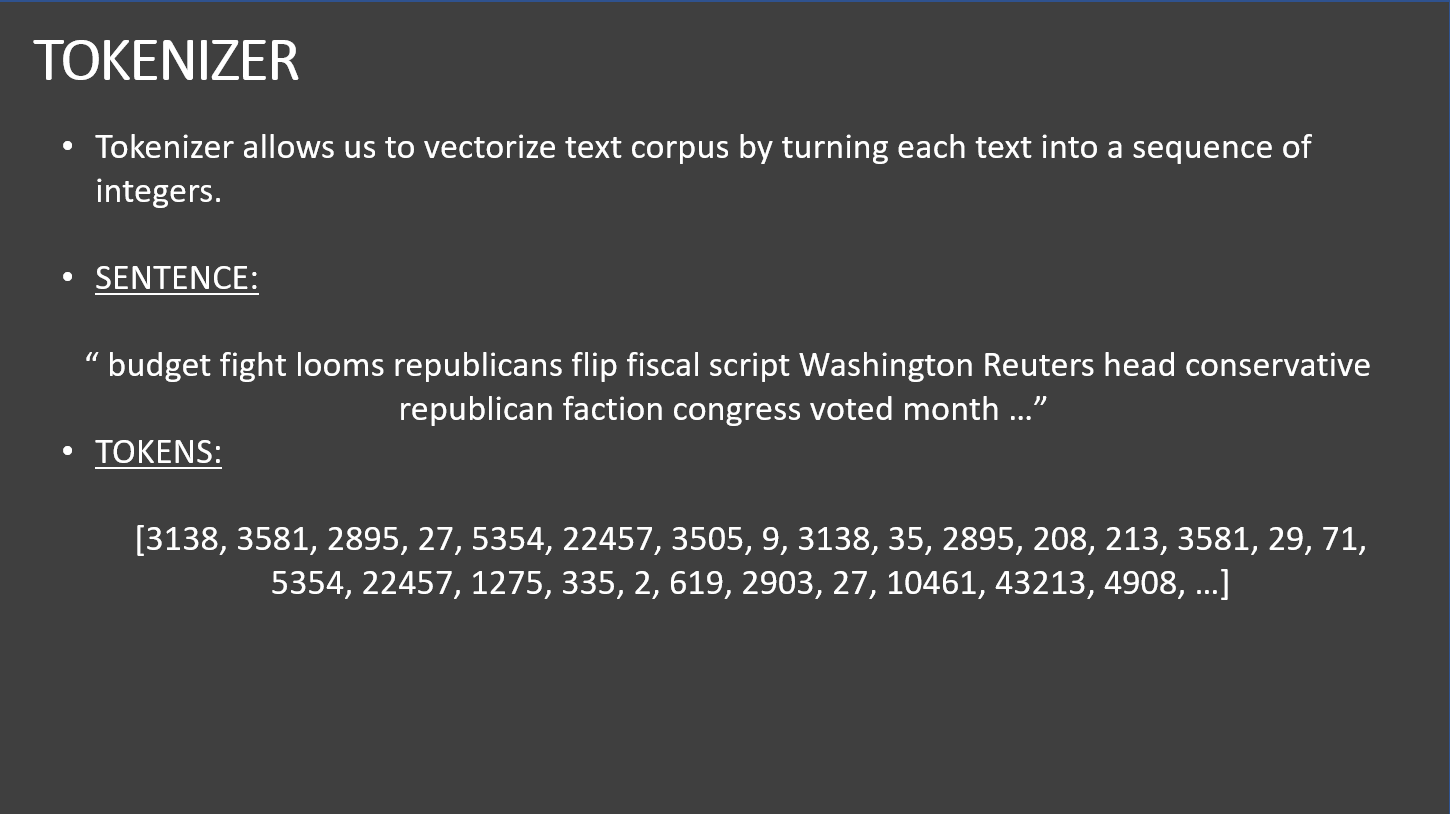

In [31]:
def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
    return tokenizer, sequences, padded
#  a tokenier to tokenize the words and create sequences of tokenized words

In [32]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [33]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [34]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [35]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [36]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [37]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [38]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [39]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)


- Change the padding length so that both english and french have the same length

In [40]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

# : UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM


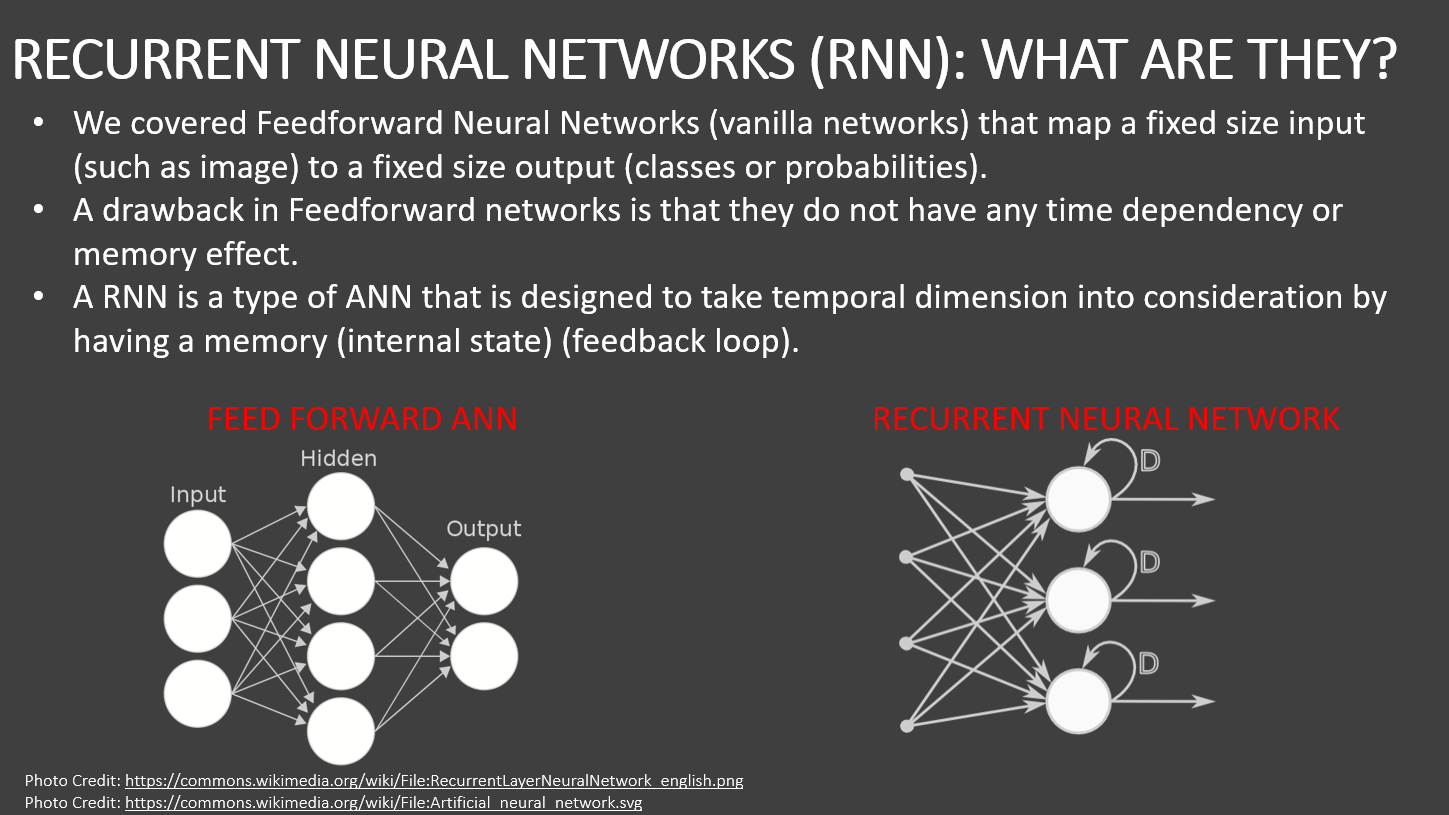

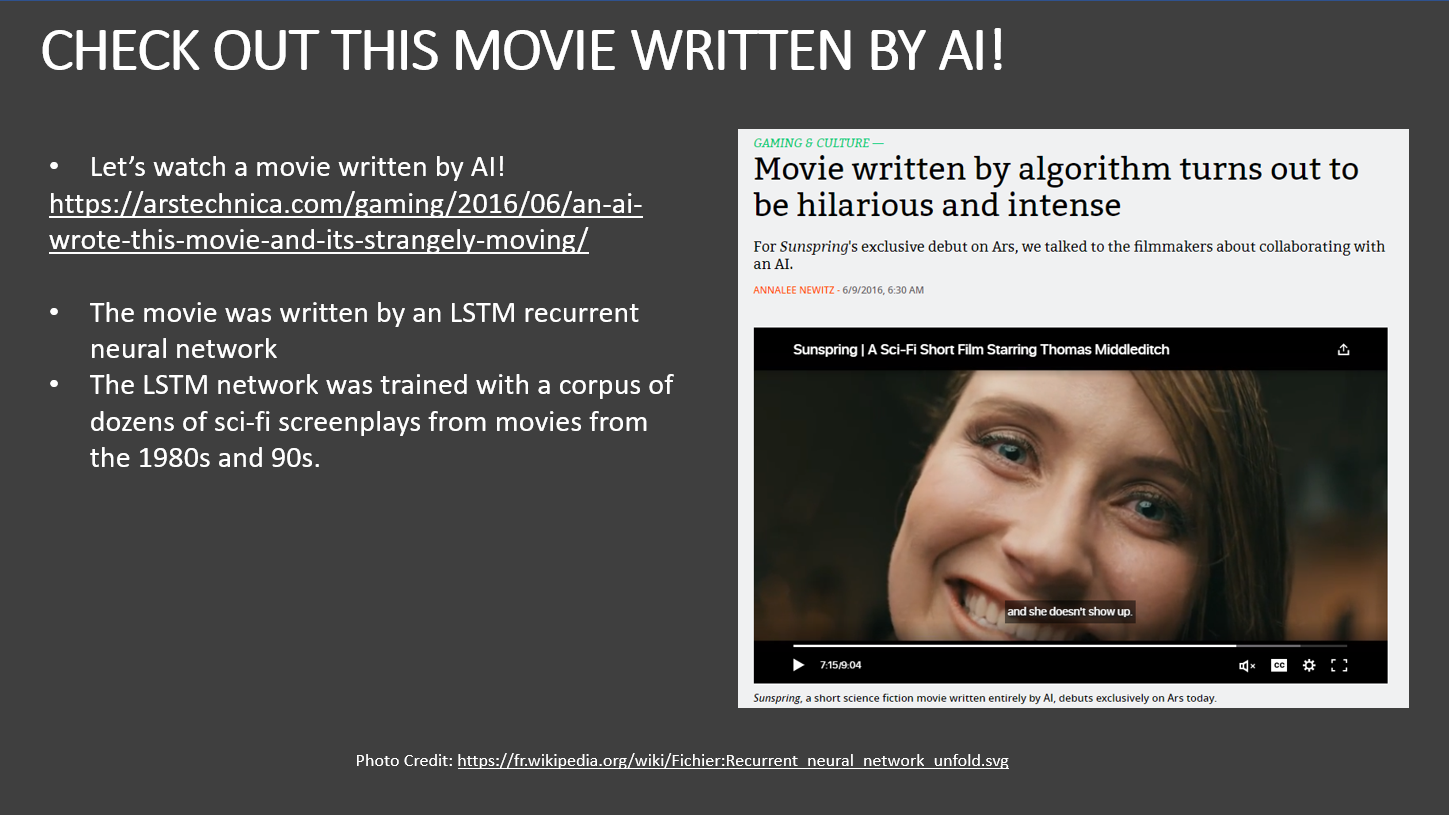

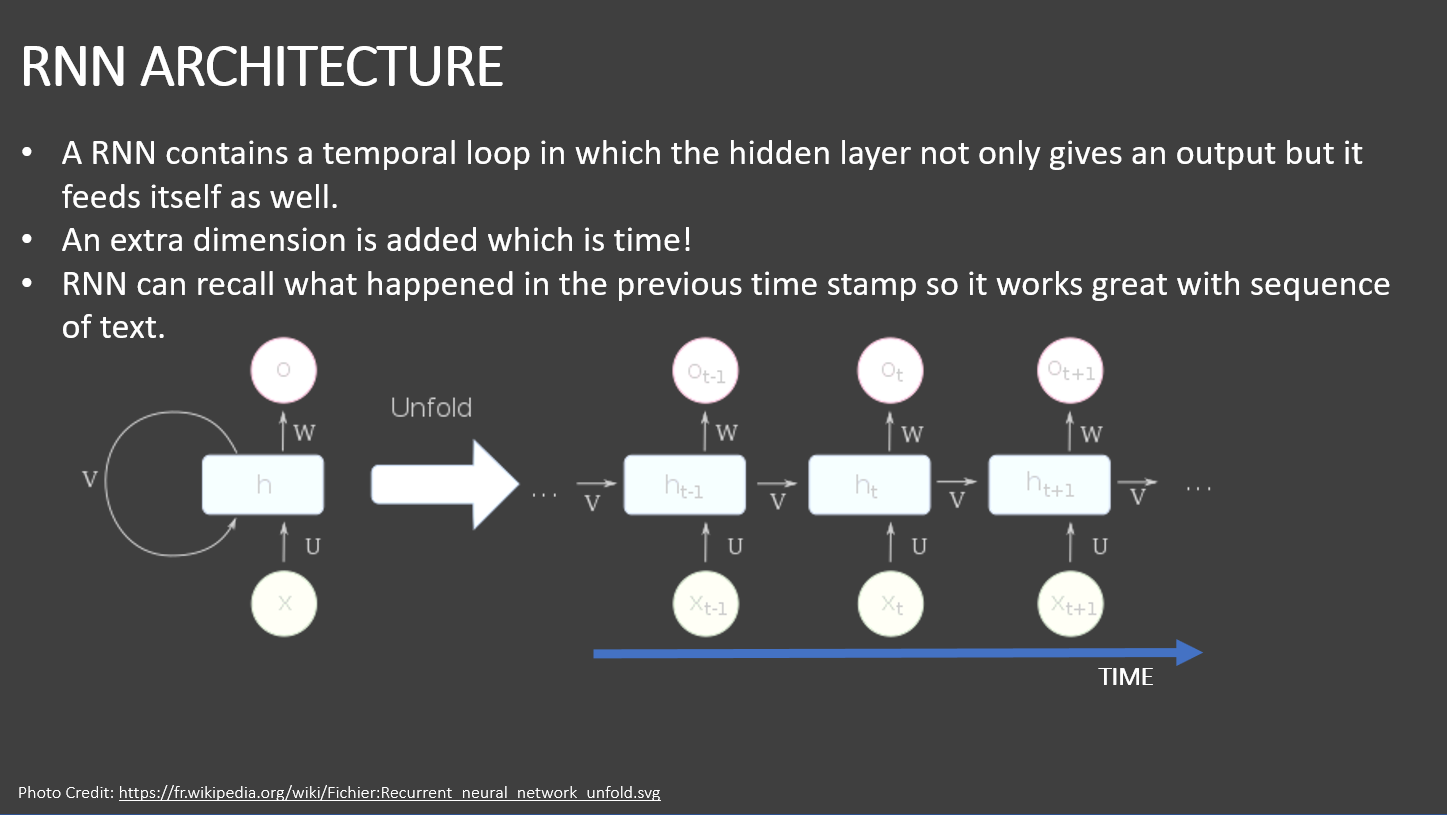

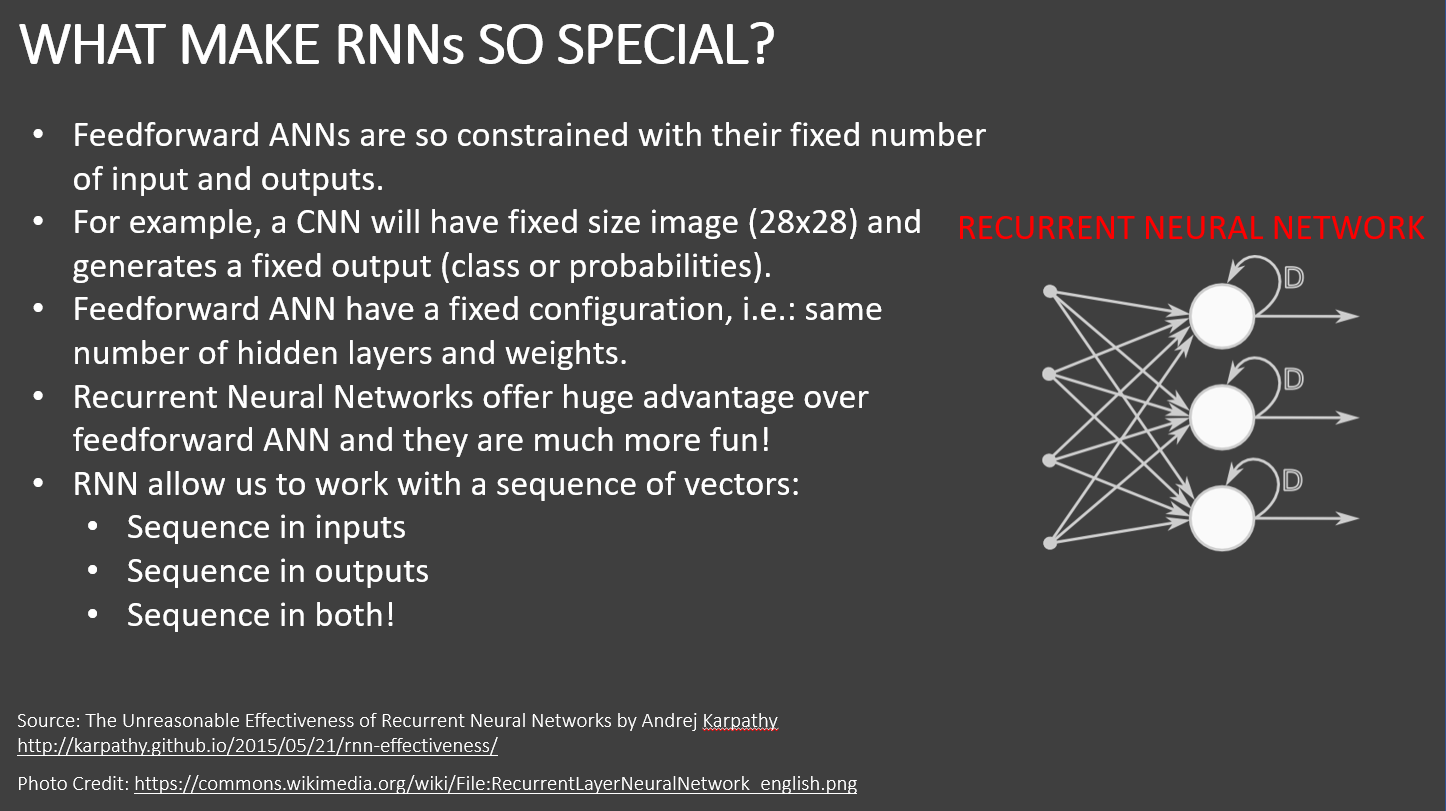

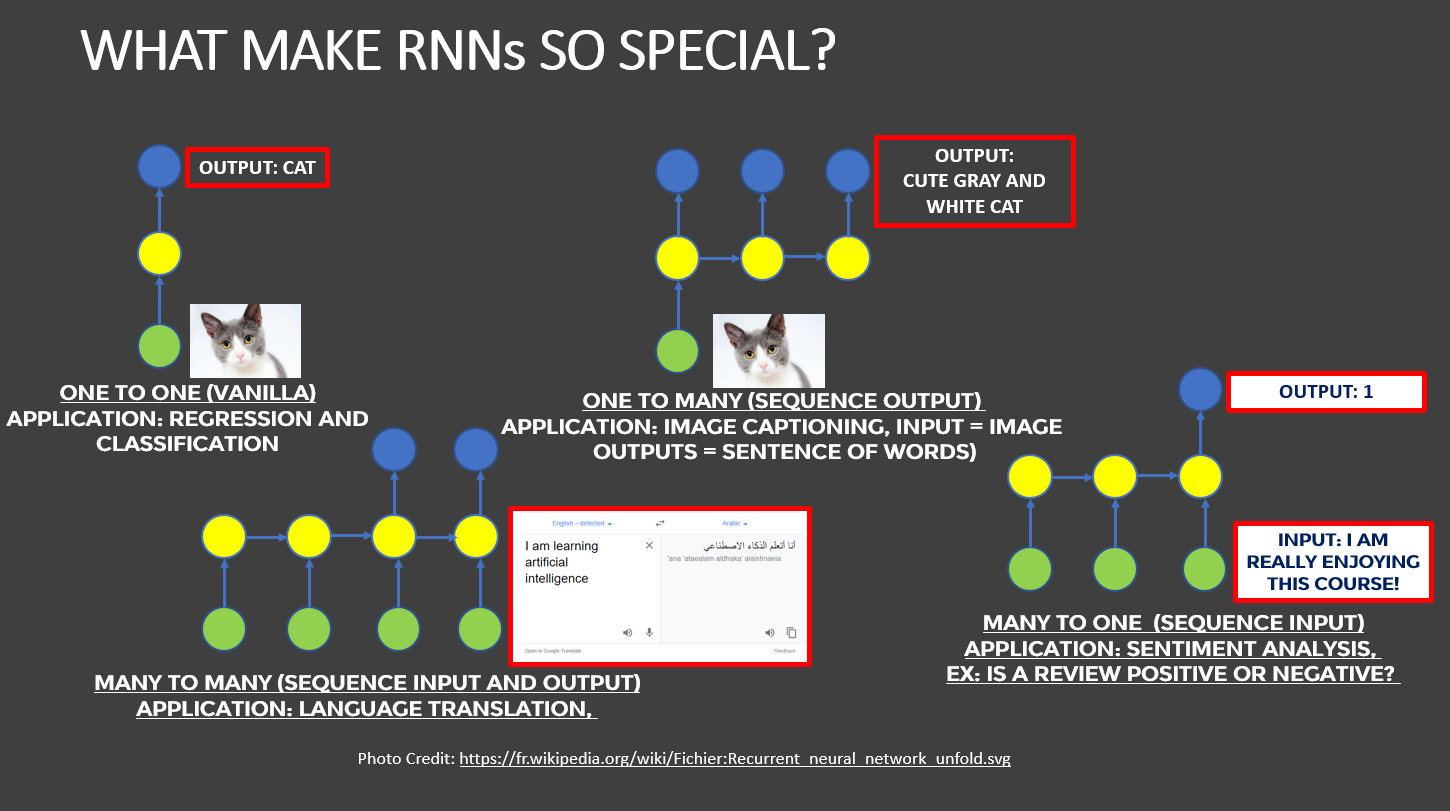

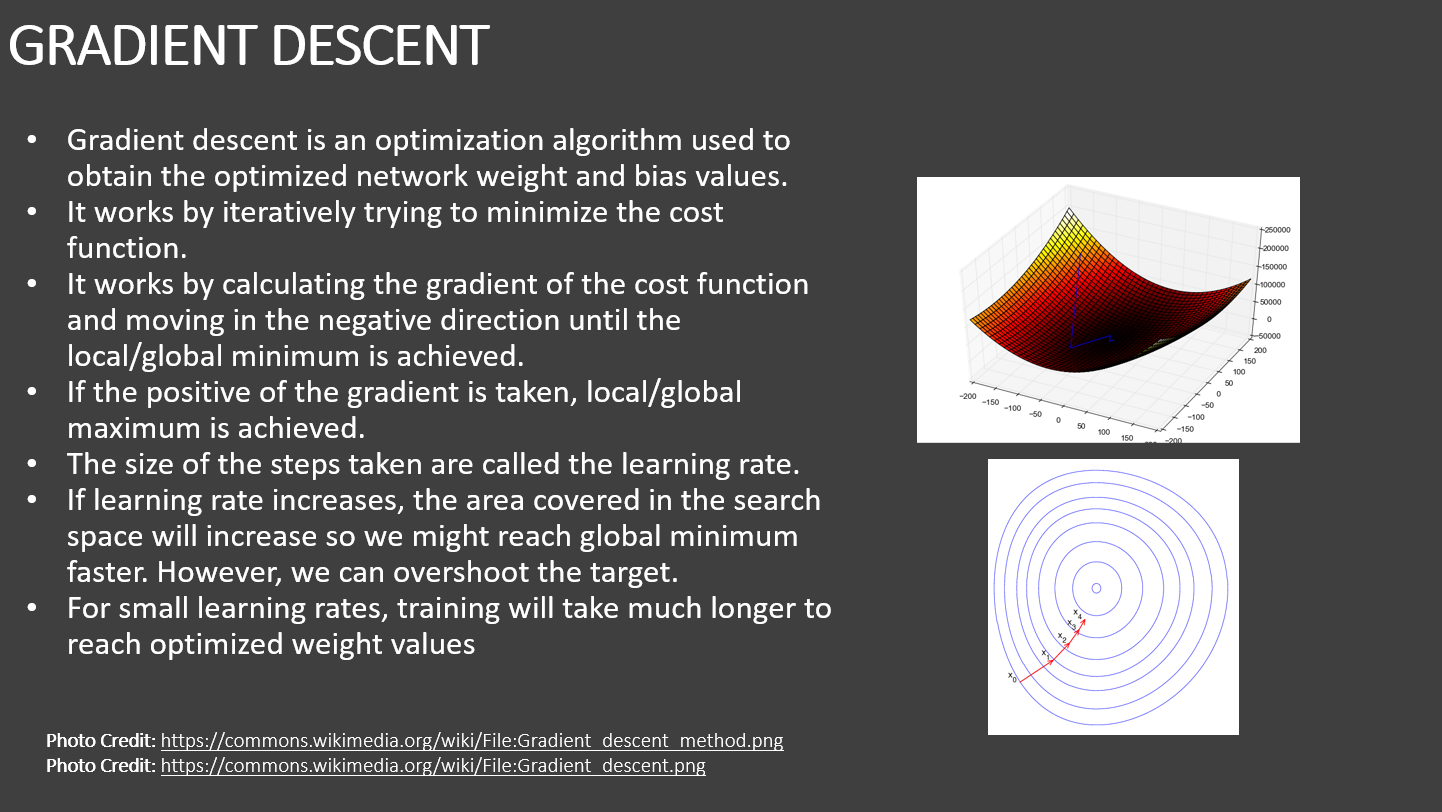

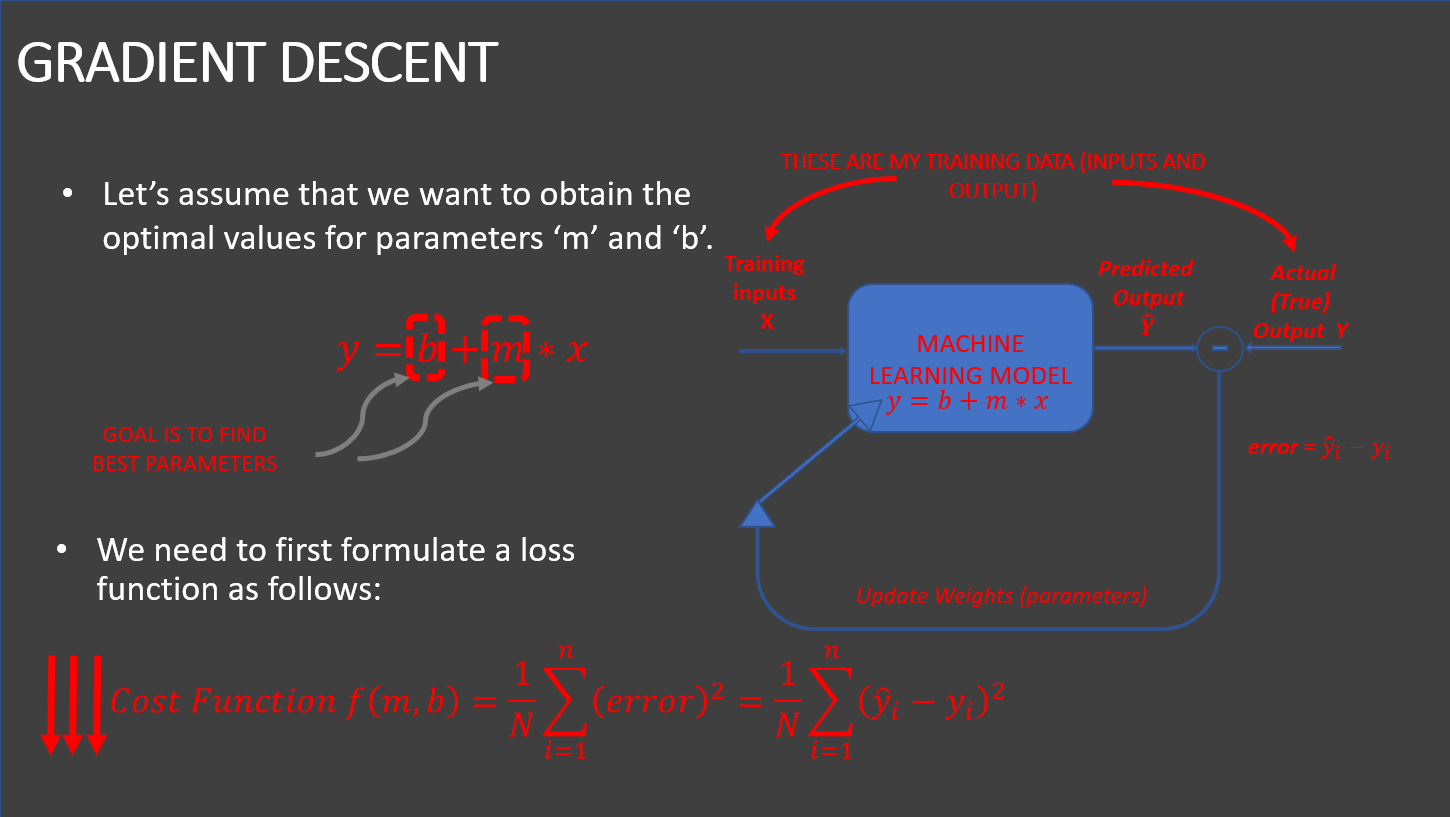

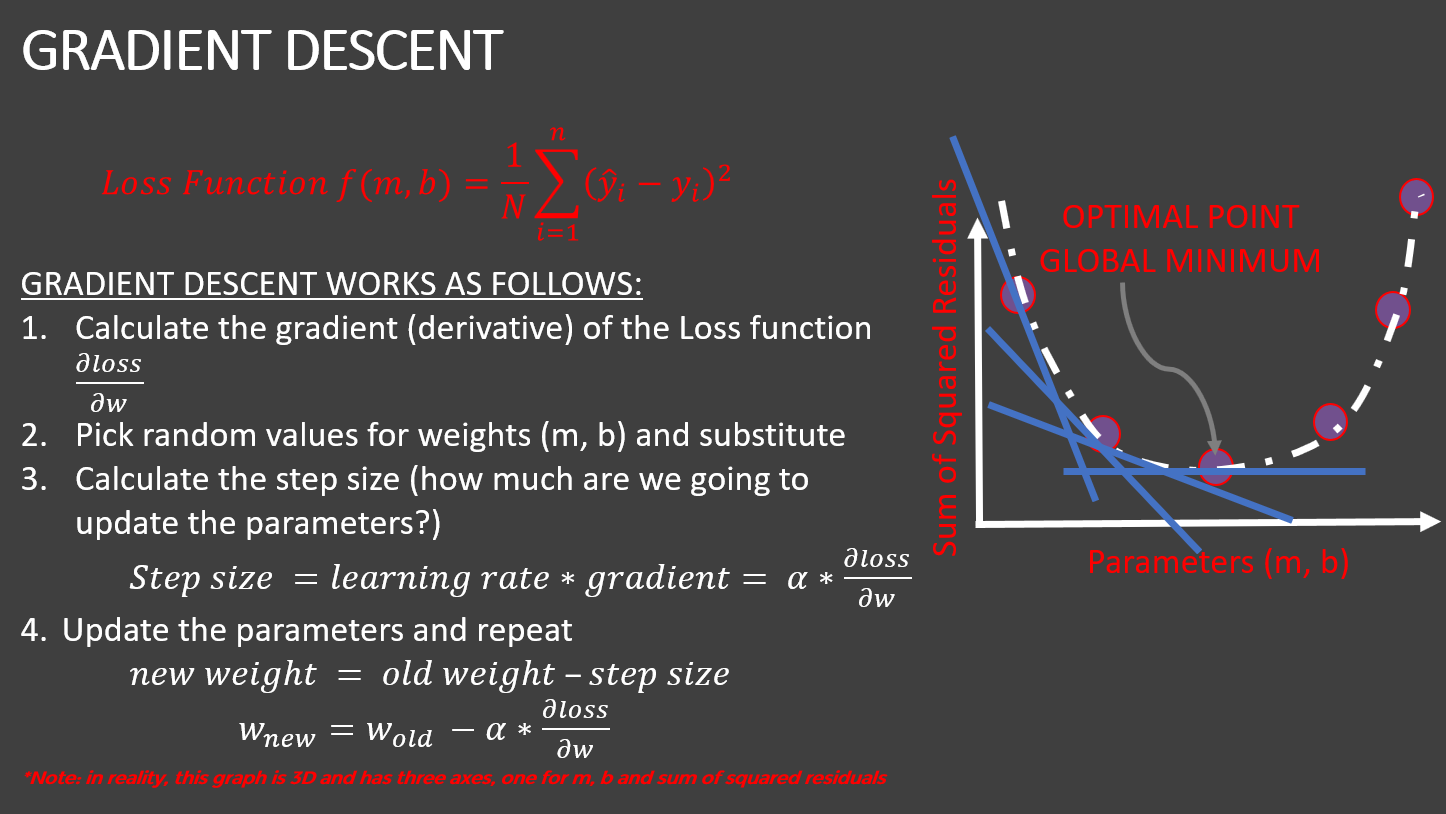

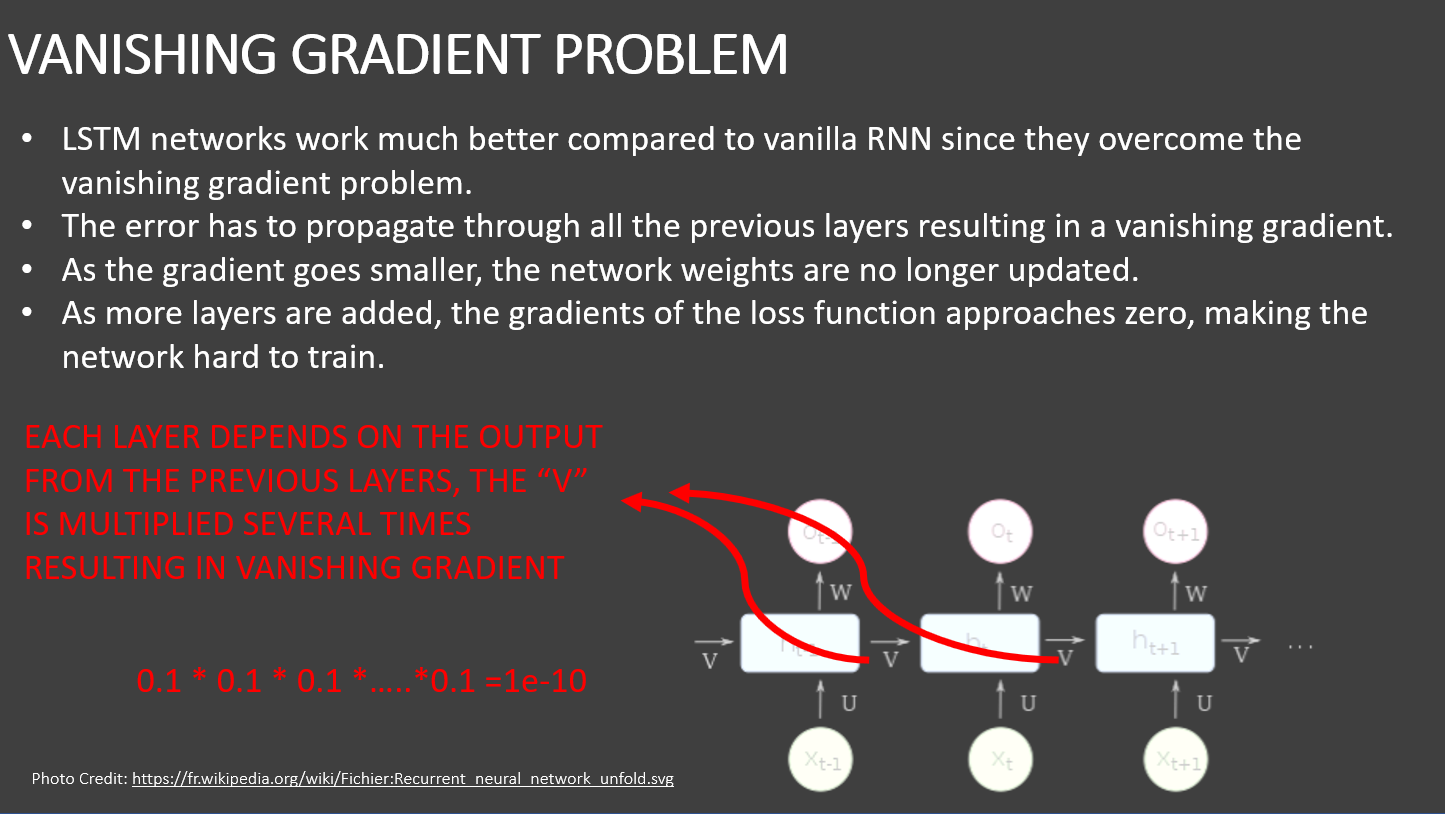

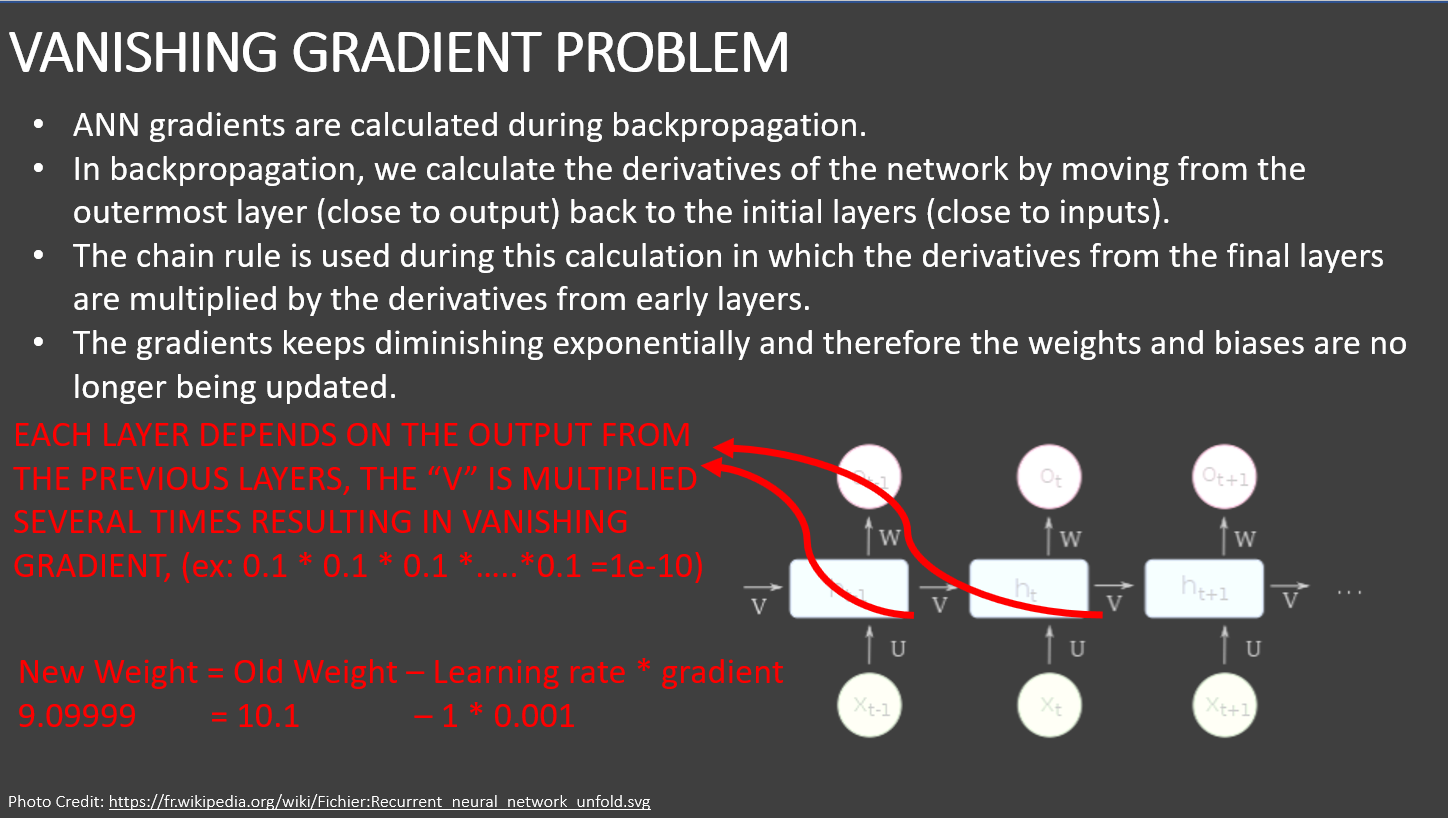

#  UNDERSTAND THE INTUITION BEHIND LONG SHORT TERM MEMORY (LSTM) NETWORKS

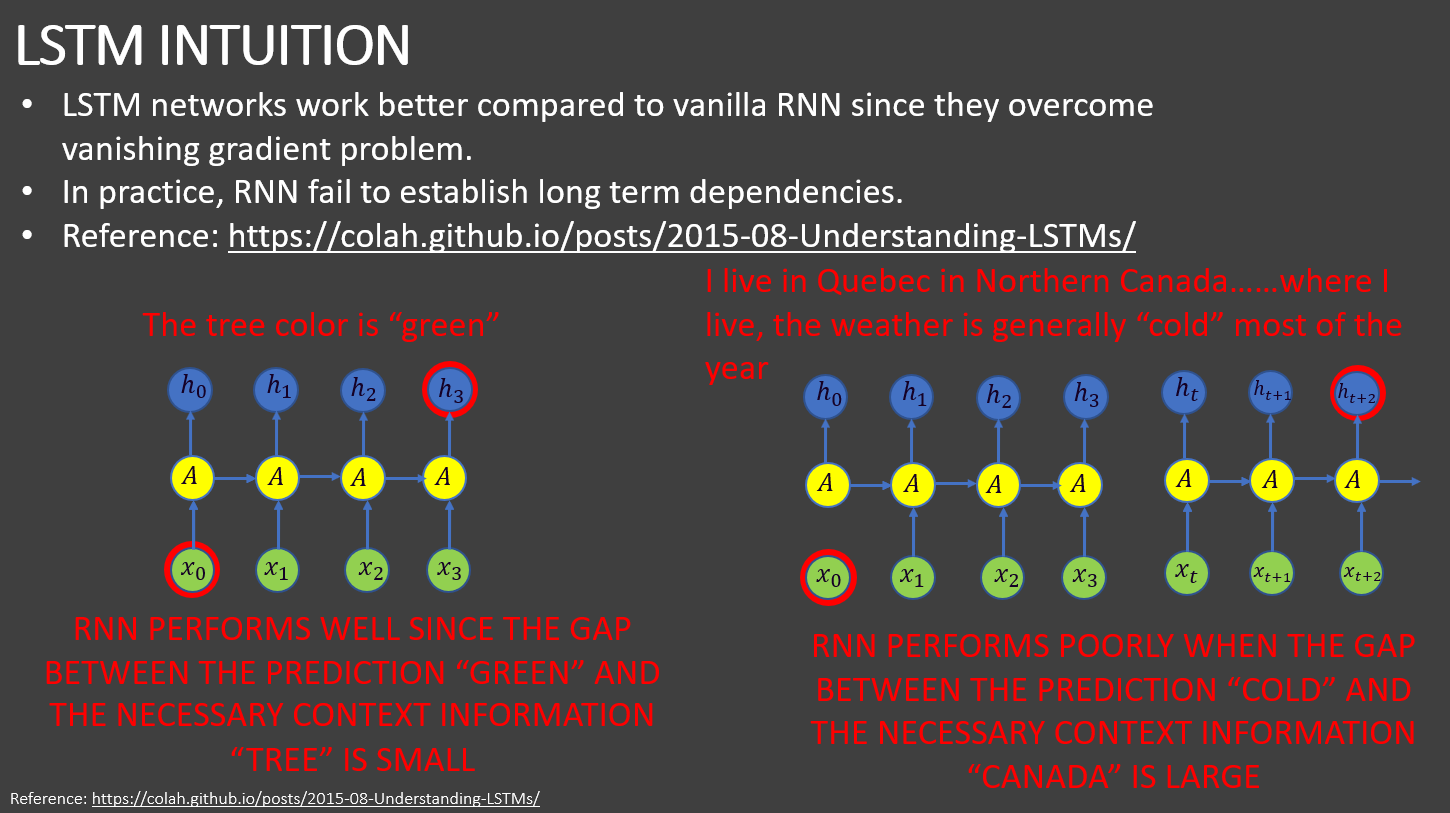

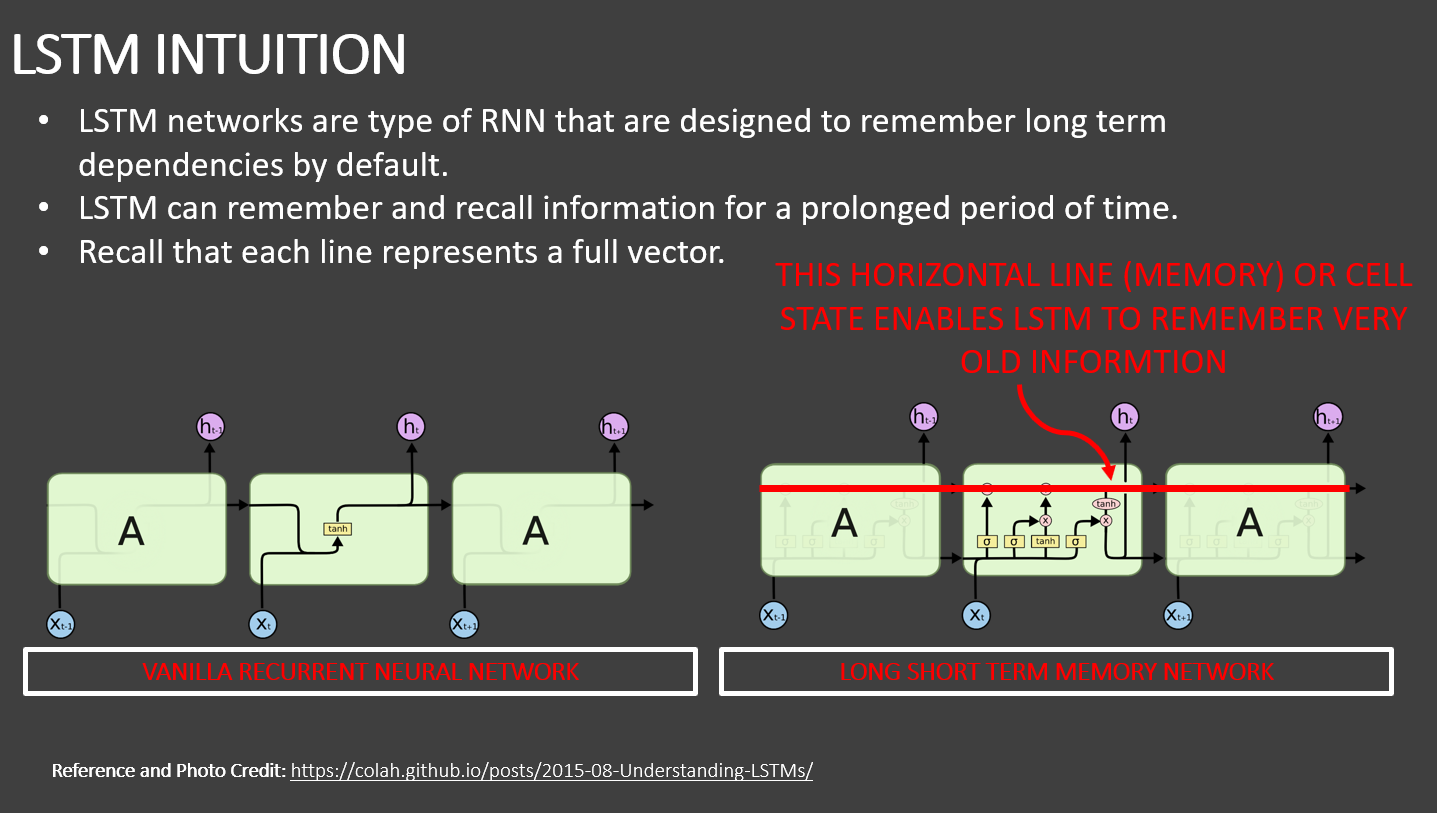

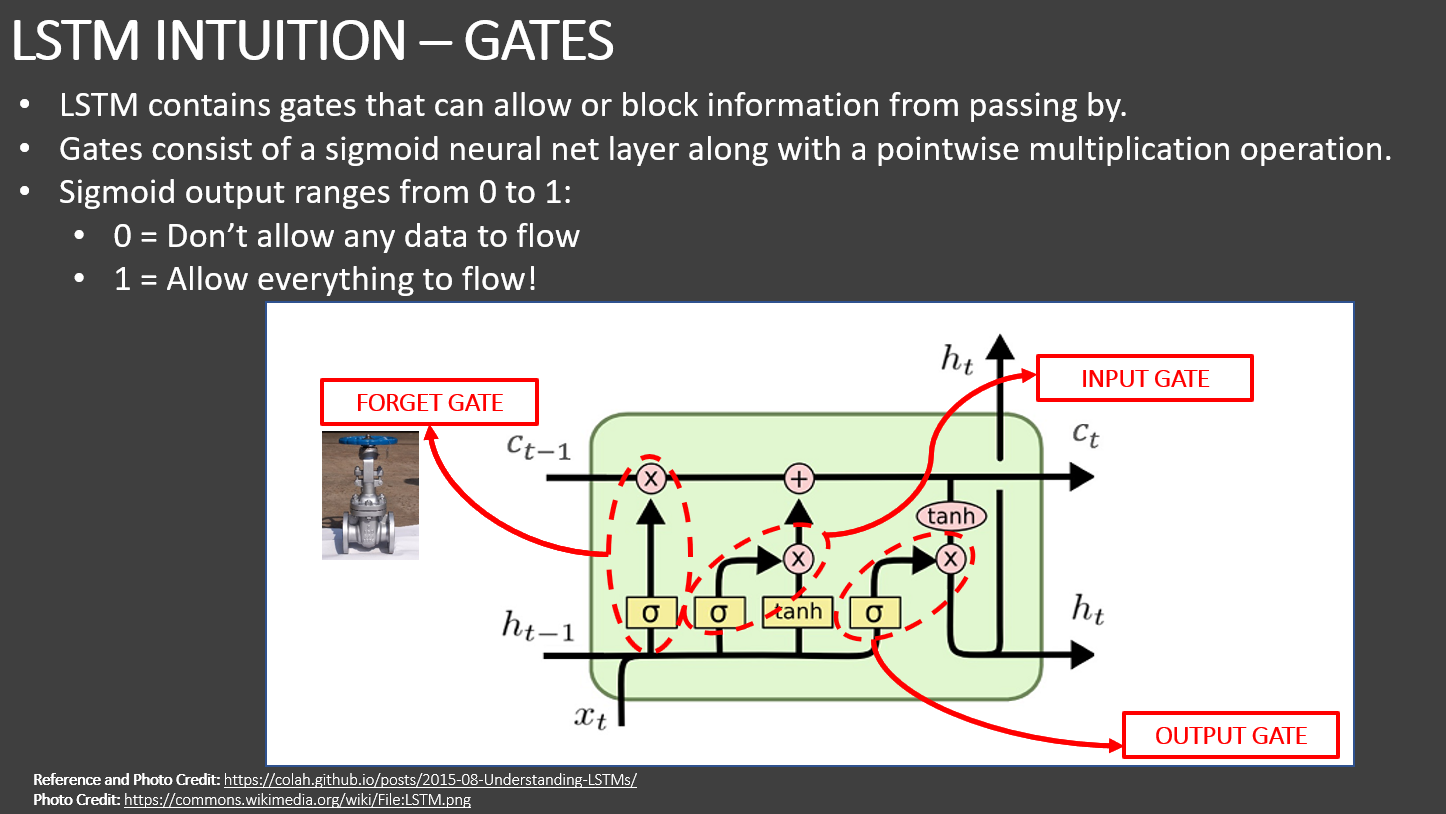

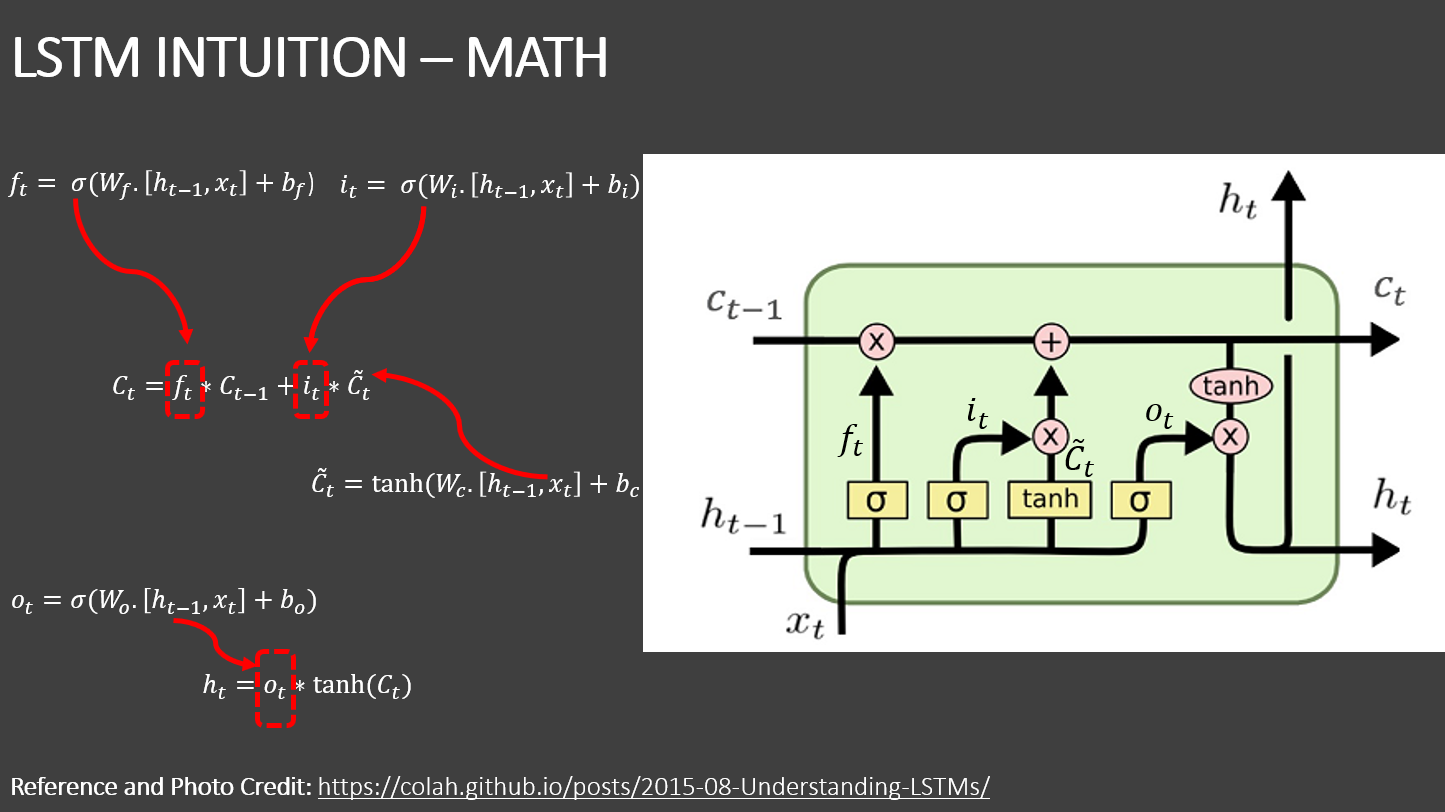

#  BUILD AND TRAIN THE MODEL 

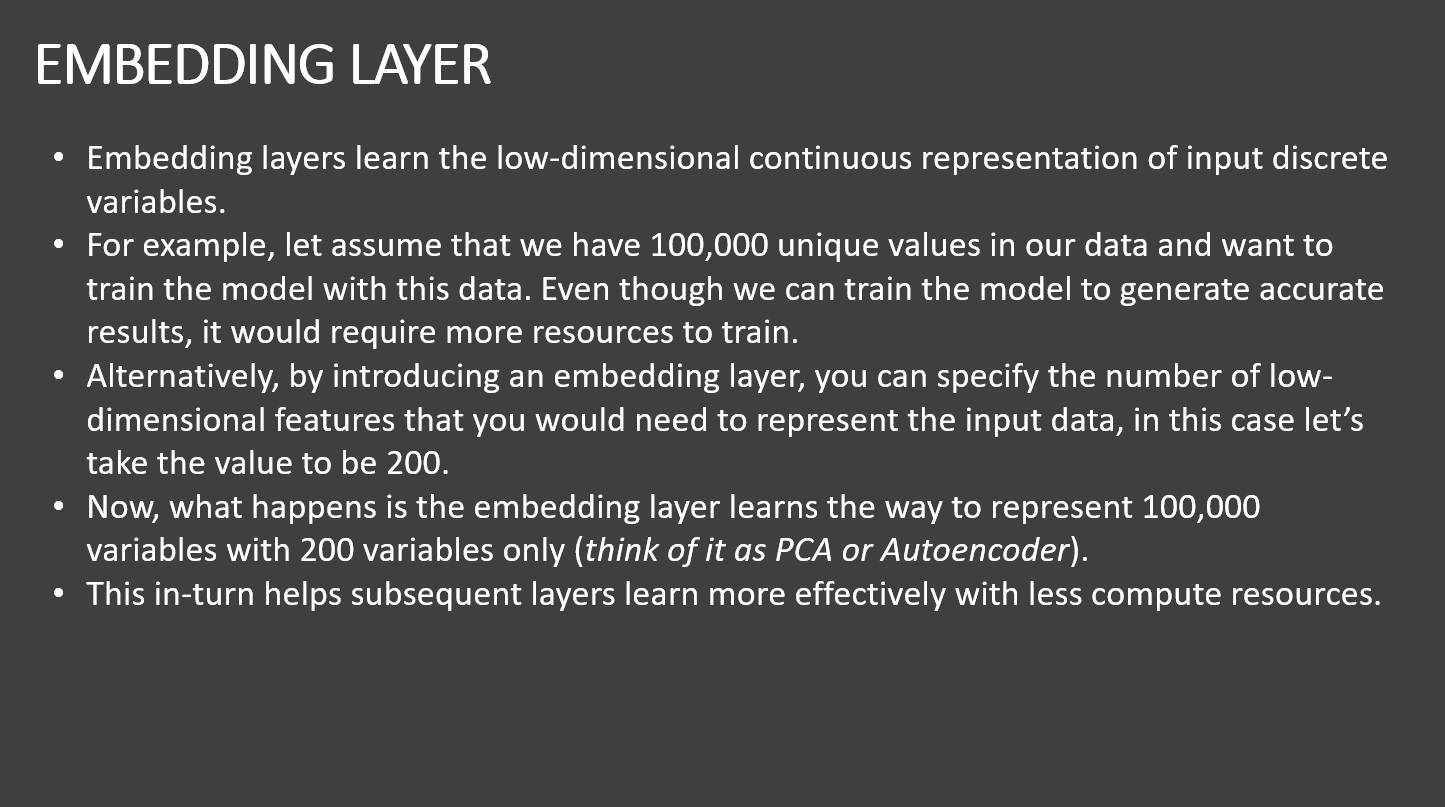

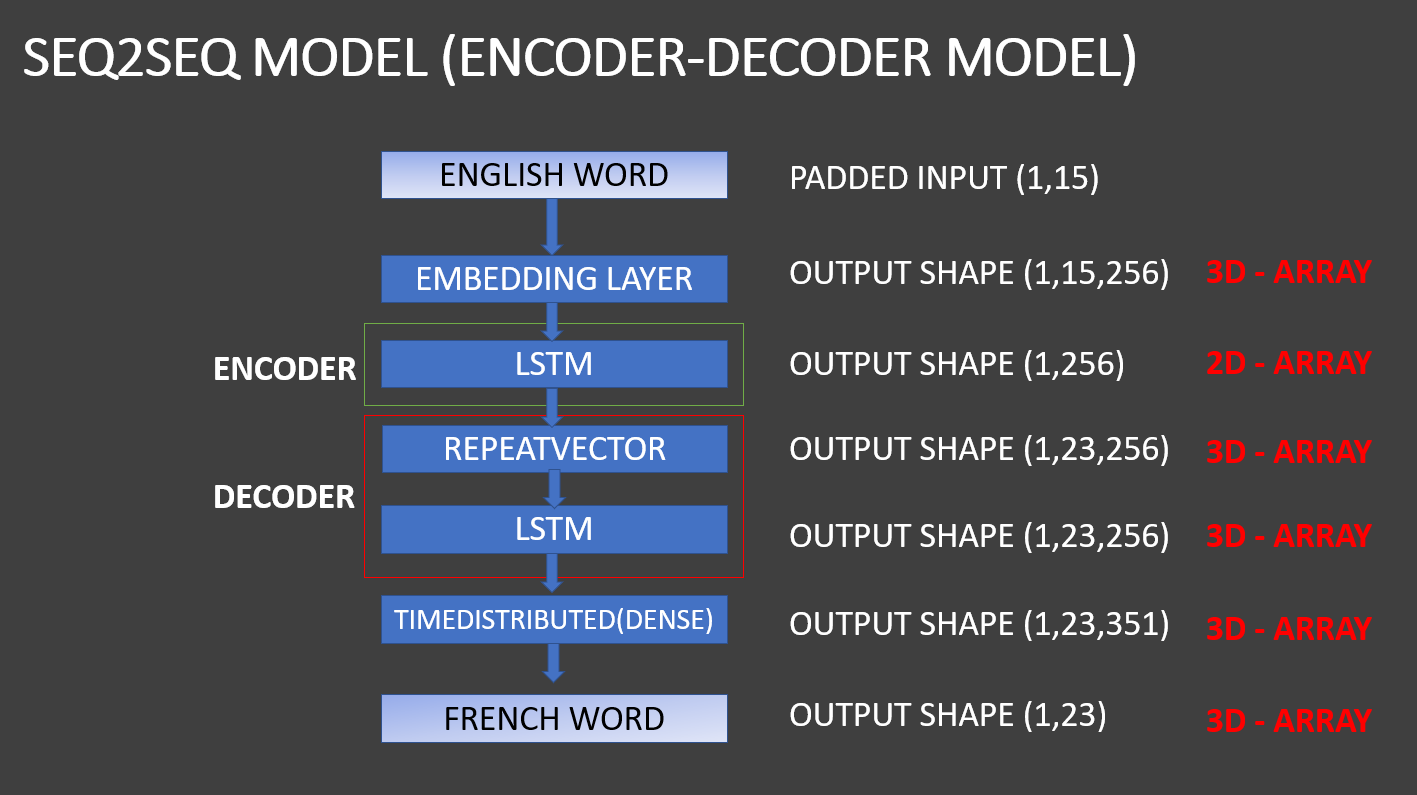

In [41]:
english_vocab_size=total_english_words+1
french_vocab_size=total_french_words+1

# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVector  (None, 23, 256)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDistr  (None, 23, 351)          90207     
 ibuted)                                                         
                                                                 
Total params: 1,192,031
Trainable params: 1,192,031
Non-

In [42]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [43]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 21s 109ms/step - loss: 2.7674 - accuracy: 0.4893 - val_loss: 2.1785 - val_accuracy: 0.5397
Epoch 2/10
110/110 [==============================] - 10s 95ms/step - loss: 1.8831 - accuracy: 0.5644 - val_loss: 1.6517 - val_accuracy: 0.5938
Epoch 3/10
110/110 [==============================] - 11s 96ms/step - loss: 1.5317 - accuracy: 0.6107 - val_loss: 1.3981 - val_accuracy: 0.6393
Epoch 4/10
110/110 [==============================] - 11s 96ms/step - loss: 1.2951 - accuracy: 0.6559 - val_loss: 1.1968 - val_accuracy: 0.6699
Epoch 5/10
110/110 [==============================] - 11s 96ms/step - loss: 1.1190 - accuracy: 0.6868 - val_loss: 1.0279 - val_accuracy: 0.7068
Epoch 6/10
110/110 [==============================] - 11s 96ms/step - loss: 0.9570 - accuracy: 0.7276 - val_loss: 0.8862 - val_accuracy: 0.7487
Epoch 7/10
110/110 [==============================] - 11s 97ms/step - loss: 0.8436 - accuracy: 0.7587 - val_loss: 0.8595 - val_accuracy

In [ ]:
# save the model
model.save("weights.h5")

#  ASSESS TRAINED MODEL PERFORMANCE


In [44]:
x_test.shape

(13786, 15)

In [45]:
x_test

array([[ 24,   1,  63, ...,   0,   0,   0],
       [ 17,  23,   1, ...,  54,   0,   0],
       [  5,  20,  21, ...,  51,   2,  54],
       ...,
       [  5,  91,   1, ...,  14,  15,   0],
       [ 18,   1,  10, ...,   0,   0,   0],
       [190,  26,  92, ...,   0,   0,   0]])

In [46]:
x_test[0]

array([24,  1, 63,  4, 61,  6,  3,  1, 62,  2, 42,  0,  0,  0,  0])

In [47]:
y_predict=model.predict(x_test)

In [48]:
y_predict

array([[[5.18359855e-07, 1.00805936e-02, 4.20315388e-07, ...,
         3.07882146e-08, 2.74335807e-08, 3.76247122e-08],
        [5.17625089e-08, 9.70826387e-01, 2.73280648e-06, ...,
         1.67375136e-09, 2.02575312e-09, 2.23542918e-09],
        [2.50868997e-08, 1.57541610e-04, 2.85199890e-03, ...,
         2.03960004e-09, 2.47823251e-09, 2.97626213e-09],
        ...,
        [9.99483466e-01, 1.71852334e-05, 1.22974685e-04, ...,
         7.58473525e-13, 1.97078573e-12, 7.44464993e-12],
        [9.99485612e-01, 1.70917447e-05, 1.22425423e-04, ...,
         7.53296459e-13, 1.96156459e-12, 7.40049515e-12],
        [9.99486566e-01, 1.70328258e-05, 1.22167447e-04, ...,
         7.50357458e-13, 1.95649204e-12, 7.37841645e-12]],

       [[7.15383095e-08, 4.38548486e-05, 3.36811601e-09, ...,
         1.26585151e-08, 1.71809891e-08, 1.13940590e-08],
        [3.66566000e-10, 2.98659829e-03, 5.05066822e-11, ...,
         1.70762876e-10, 1.61077901e-10, 1.36328004e-10],
        [1.94029504e-09, 

In [49]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [50]:
for i in range(5):
    print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
    print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - france is rainy during august but it is chilly in september    

Original French word - france est pluvieux au mois d' août mais il est froid en septembre          

Predicted French word - chine est chaud au mois d' août il est jamais en septembre           




Original English word - new jersey is never relaxing during fall and it is snowy in october  

Original French word - new jersey est jamais relaxant à l'automne et il est neigeux en octobre          

Predicted French word - new jersey est jamais à à l'automne et il est en en           




Original English word - the united states is sometimes pleasant during autumn and it is usually freezing in october

Original French word - les états unis est parfois agréable au cours de l' automne et il gèle habituellement en octobre      

Predicted French word - les états unis est parfois agréable à l'automne et il est en en en         




Original English word - we plan to visit paris in november        

Origi